In [2]:
import dblp
import gensim
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
import numpy as np
import scipy
import os
import itertools as it
from importlib import reload
import pandas as pd
import matplotlib.pyplot as plt
reload(dblp);

In [3]:
model_file = "../data/lda/inproceedings.lda"
dct_file = "../data/dct/inproceedings.dct"
tsv_file = "../data/tsv/inproceedings.csv"

In [4]:
model = LdaModel.load(model_file)
dct = Dictionary.load(dct_file)

In [5]:
texts = list(dblp.iter_text(tsv_file, timestamp=True))
texts.sort() 

In [6]:
docs = it.groupby(dblp.iter_document(texts), lambda x: x[0])

In [7]:
topics = []
years = []
for year, group in docs:
    years.append(year)
    T = dblp.docs2topicvec([x[1] for x in group], dct, model)
    topicvec = np.mean(T, axis=0)
    topics.append(topicvec)
    print("%s has %d articles." % (year, T.shape[0]))

1959 has 80 articles.
1960 has 9 articles.
1961 has 26 articles.
1962 has 147 articles.
1963 has 13 articles.
1964 has 42 articles.
1965 has 75 articles.
1966 has 157 articles.
1967 has 279 articles.
1968 has 549 articles.
1969 has 456 articles.
1970 has 306 articles.
1971 has 631 articles.
1972 has 631 articles.
1973 has 1007 articles.
1974 has 1359 articles.
1975 has 1326 articles.
1976 has 1639 articles.
1977 has 1701 articles.
1978 has 2152 articles.
1979 has 2156 articles.
1980 has 2496 articles.
1981 has 2870 articles.
1982 has 3270 articles.
1983 has 3626 articles.
1984 has 4531 articles.
1985 has 4490 articles.
1986 has 6139 articles.
1987 has 6540 articles.
1988 has 8410 articles.
1989 has 9980 articles.
1990 has 12098 articles.
1991 has 13055 articles.
1992 has 14447 articles.
1993 has 19674 articles.
1994 has 22080 articles.
1995 has 22421 articles.
1996 has 24295 articles.
1997 has 27782 articles.
1998 has 31803 articles.
1999 has 35193 articles.
2000 has 40051 articles.
20

In [78]:
tm = np.array(topics)

In [80]:
df = pd.DataFrame(tm)
df.index = years

In [93]:
norm_df = df / df.sum()

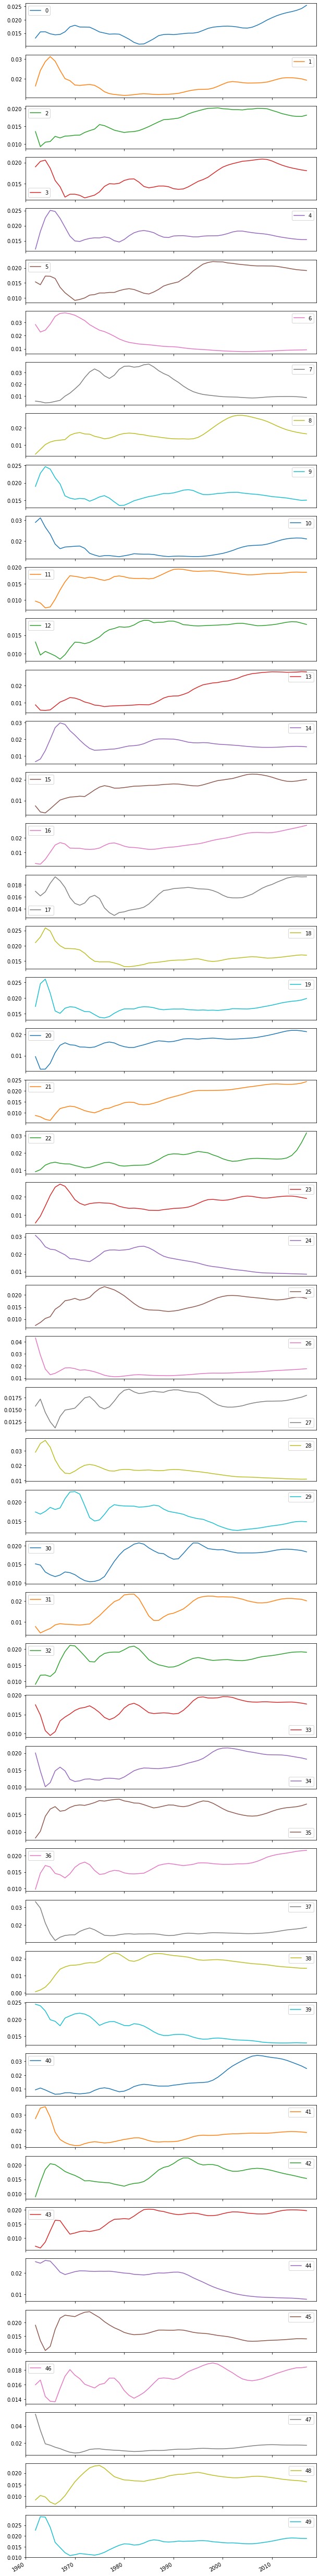

In [95]:
norm_df.rolling(
    5, win_type='gaussian', center=True).mean(
    std=1.5).plot(
    figsize=(10, 100), subplots=True);

In [114]:
der_df = norm_df.diff(1).fillna(0)

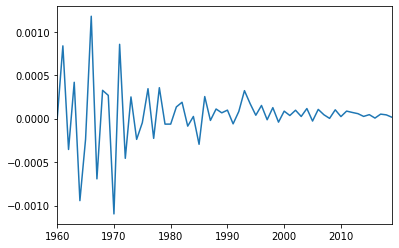

In [130]:
der_df.mean(axis=1).plot()